# Proyecto Big Data 
## Reviews de Películas
### Grupo2

In [1]:
%pip install duckdb

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install polars

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importación de datos

In [4]:
#Medir tiempo
import time

tiempoInicio = time.time()

In [5]:
import pandas as pd
import duckdb

In [6]:
#Realizamos la conexión 
conexion = duckdb.connect("./grupo2_bigdata.db")

### 1. USER_REVIEWS_S

In [7]:
#Creamos la tabla
conexion.query(
"""
CREATE TABLE USER_REVIEWS AS
SELECT * FROM './user_reviews.csv'
"""
)

In [8]:
#Resumen
duck_df=conexion.query(
"""
    SUMMARIZE SELECT * FROM USER_REVIEWS;
"""
)

In [10]:
duck_df.to_df() 

,column_name,column_type,min,max,approx_unique,avg,std,q25,q50,q75,count,null_percentage
0,movieId,VARCHAR,0009c18f-a374-3d9d-a7da-ad5395b67b13,fffacf6b-eb34-3a4c-b461-5548a6bfaea7,9805,None,None,None,None,None,55130430,0.00
1,rating,DOUBLE,0.5,5.0,11,3.6682733746136207,1.2579098520388428,3.0,4.0,4.99999852160044,55130430,0.00
2,quote,VARCHAR,Hilarious if ya like that sort of thing,🫶🏽🫶🏽🫶🏽🫶🏽🫶🏽🫶🏽🫶🏽🫶🏽🫶🏽,47952236,None,None,None,None,None,55130430,0.00
3,reviewId,VARCHAR,00000013-989b-460c-93a4-4c557f350e86,fffffcc4-bcab-4083-b025-cdaaee29e788,9705933,None,None,None,None,None,55130430,77.05
4,isVerified,BOOLEAN,false,true,2,None,None,None,None,None,55130430,0.00
5,isSuperReviewer,BOOLEAN,false,true,2,None,None,None,None,None,55130430,0.00
6,hasSpoilers,BOOLEAN,false,true,2,None,None,None,None,None,55130430,0.00
7,hasProfanity,BOOLEAN,false,true,2,None,None,None,None,None,55130430,0.00
8,score,DOUBLE,0.5,5.0,11,3.6682733746136207,1.2579098520388428,3.0,4.0,4.99999852160044,55130430,0.00
9,creationDate,DATE,1996-01-19,2024-07-17,7748,None,None,2007-06-05,2007-10-12,2008-11-11,55130430,0.00


In [11]:
# columnas
columnas_df=conexion.query(
"""
    SELECT * FROM USER_REVIEWS LIMIT 1;
"""
)
c = columnas_df.to_df() 
c.columns

Index(['movieId', 'rating', 'quote', 'reviewId', 'isVerified',
       'isSuperReviewer', 'hasSpoilers', 'hasProfanity', 'score',
       'creationDate', 'userDisplayName', 'userRealm', 'userId'],
      dtype='object')

### 2. MOVIES

In [12]:
#Creamos la tabla
conexion.query(
"""
CREATE TABLE MOVIES AS
SELECT * FROM './movies.csv'
"""
)

In [13]:
#Resumen
duck2_df=conexion.query(
"""
    SUMMARIZE SELECT * FROM MOVIES;
"""
)

In [14]:
duck2_df.to_df() 

,column_name,column_type,min,max,approx_unique,avg,std,q25,q50,q75,count,null_percentage
0,movieId,VARCHAR,0009c18f-a374-3d9d-a7da-ad5395b67b13,fffacf6b-eb34-3a4c-b461-5548a6bfaea7,9557,None,None,None,None,None,10233,0.00
1,movieYear,BIGINT,1902,2024,123,2008.3660705560442,16.77052352532826,2003,2014,2020,10233,0.00
2,movieURL,VARCHAR,https://www.rottentomatoes.com/m/0814255,https://www.rottentomatoes.com/m/zulu_dawn,10947,None,None,None,None,None,10233,0.00
3,movieTitle,VARCHAR,"""Sr.""",mother!,10556,None,None,None,None,None,10233,0.00
4,critic_score,DOUBLE,0.0,100.0,134,63.66543438077634,27.918652620391345,41.61485563792431,70.18226087427452,87.93445878848063,10233,4.84
5,critic_sentiment,VARCHAR,negative,positive,2,None,None,None,None,None,10233,4.84
6,audience_score,DOUBLE,0.0,100.0,134,64.36070583596215,20.85482459049245,48.978955407305996,67.19822862220198,81.70712669683257,10233,0.87
7,audience_sentiment,VARCHAR,negative,positive,2,None,None,None,None,None,10233,0.87
8,release_date_theaters,VARCHAR,"Apr 1, 1923, Wide","Sep 9, 2022, Wide",4398,None,None,None,None,None,10233,22.53
9,release_date_streaming,VARCHAR,"Apr 1, 2008","Sep 9, 2022",2485,None,None,None,None,None,10233,0.00


In [15]:
# columnas
columnas_df=conexion.query(
"""
    SELECT * FROM MOVIES LIMIT 1;
"""
)
c = columnas_df.to_df() 
c.columns

Index(['movieId', 'movieYear', 'movieURL', 'movieTitle', 'critic_score',
       'critic_sentiment', 'audience_score', 'audience_sentiment',
       'release_date_theaters', 'release_date_streaming', 'rating',
       'original_language', 'runtime'],
      dtype='object')

### 3. CRITIC_REVIEWS

In [16]:
#Creamos la tabla
conexion.query(
"""
CREATE TABLE CRITIC_REVIEWS AS
SELECT * FROM './critic_reviews.csv'
"""
)

In [17]:
#Resumen
duck3_df=conexion.query(
"""
    SUMMARIZE SELECT * FROM CRITIC_REVIEWS;
"""
)

In [18]:
duck3_df.to_df() 

,column_name,column_type,min,max,approx_unique,avg,std,q25,q50,q75,count,null_percentage
0,reviewId,BIGINT,1,102931223,937665,16090020.53292082,34981840.70628164,1741531,2284816,2676377,967564,0.00
1,movieId,VARCHAR,0009c18f-a374-3d9d-a7da-ad5395b67b13,fffacf6b-eb34-3a4c-b461-5548a6bfaea7,9557,None,None,None,None,None,967564,0.00
2,creationDate,DATE,1800-01-01,2024-07-16,8608,None,None,2008-05-12,2015-10-31,2020-03-08,967564,0.00
3,criticName,VARCHAR,Anjolie Therrien,Éric Rohmer,10536,None,None,None,None,None,967564,0.98
4,criticPageUrl,VARCHAR,/critics/-jose-homero-,/critics/zosia-bielski,12330,None,None,None,None,None,967564,0.98
5,reviewState,VARCHAR,fresh,rotten,2,None,None,None,None,None,967564,0.00
6,isFresh,BOOLEAN,false,true,2,None,None,None,None,None,967564,0.00
7,isRotten,BOOLEAN,false,true,2,None,None,None,None,None,967564,0.00
8,isRtUrl,BOOLEAN,false,true,2,None,None,None,None,None,967564,5.84
9,isTopCritic,BOOLEAN,false,true,2,None,None,None,None,None,967564,0.00


In [19]:
# columnas
columnas_df=conexion.query(
"""
    SELECT * FROM CRITIC_REVIEWS LIMIT 1;
"""
)
c = columnas_df.to_df() 
c.columns

Index(['reviewId', 'movieId', 'creationDate', 'criticName', 'criticPageUrl',
       'reviewState', 'isFresh', 'isRotten', 'isRtUrl', 'isTopCritic',
       'publicationUrl', 'publicationName', 'reviewUrl', 'quote',
       'scoreSentiment', 'originalScore'],
      dtype='object')

In [20]:
tiempoFinal = time.time()
tiempoTotal = tiempoFinal - tiempoInicio
print(tiempoTotal)

686.3053081035614


In [21]:
#Medir tiempo
import time

tiempoInicio2 = time.time()

### COMPONENTE A: Análisis Exploratorio de Datos (EDA)


- En todos los proyectos los estudiantes deberán realizar, en Polars o DuckDB, un análisis exploratorio a los datos. 
- Los análisis a realizar son a discreción de los estudiantes. Idealmente utilizarán los conocimientos aprendidos a lo largo de todos los módulos del bootcamp para elegir los análisis más relevantes.


### Obtener estadísticas básicas de las películas

In [22]:
movies_stats = conexion.execute("""
    SELECT 
        COUNT(*) as total_movies,
        COUNT(DISTINCT movieYear) as unique_years,
        AVG(critic_score) as avg_critic_score,
        AVG(audience_score) as avg_audience_score,
        MIN(movieYear) as earliest_year,
        MAX(movieYear) as latest_year
    FROM MOVIES
""").df()
display(movies_stats)

,total_movies,unique_years,avg_critic_score,avg_audience_score,earliest_year,latest_year
0,10233,105,63.665434,64.360706,1902,2024


Hay un total de 10233 peliculas con un rango de registro de 105 años. El puntaje promedio de los criticos es 63 vs un 64 de la audiencia. La pelicula mas antigua registrada es de 1902 y la mas actual data del 2024.

### Cantidad de review de críticos por película

In [23]:
rp = conexion.query(
"""
SELECT M.movieTitle, COUNT(C.reviewId) as num_reviews
FROM MOVIES M
LEFT JOIN CRITIC_REVIEWS C
ON M.movieId = C.movieId
GROUP BY M.movieTitle
ORDER BY num_reviews DESC;
"""
).df()
rp

,movieTitle,num_reviews
0,Beauty and the Beast,982
1,"Three Billboards Outside Ebbing, Missouri",830
2,Candyman,752
3,Mulan,745
4,Fantastic Four,736
...,...,...
9852,Night Train,1
9853,Blue Mountain State: The Rise of Thadland,1
9854,Clinical,1
9855,A Muse,1


Se observa que las películas que más han obtenido reviews de críticos son: Beauty and the Beast(982), Three Billboards Outside Ebbing, Missouri(830) y Candyman(752).

### Cantidad de reviews de críticos por año de película

In [24]:
reviews_año = conexion.query(
"""
SELECT M.movieYear, COUNT(C.reviewId) as cant_reviews
FROM MOVIES M
LEFT JOIN CRITIC_REVIEWS C
ON M.movieId = C.movieId
GROUP BY M.movieYear
ORDER BY cant_reviews DESC;
"""
).df()
reviews_año

,movieYear,cant_reviews
0,2018,55369
1,2019,53918
2,2016,52021
3,2017,51688
4,2021,48880
...,...,...
100,1925,54
101,1926,50
102,1915,45
103,1929,43


Los años donde se han obtenido mayor cantidad de reviews de críticos son: 2018 con 55369 reviewws de críticos, 2019 con 53918 reviewws de críticos, y 2016 con 52021 reviewws de críticos.

### TOP 10 película con mayor Mediana de critic_score

In [25]:
base = conexion.query(
"""
SELECT movieTitle, MEDIAN(critic_score) as M_score
FROM MOVIES 
GROUP BY movieTitle
ORDER BY M_score DESC
LIMIT 10;
""").df()
base

,movieTitle,M_score
0,The Killers,100.0
1,Old Yeller,100.0
2,How to Steal a Million,100.0
3,Curse of the Demon,100.0
4,Red Headed Woman,100.0
5,Hara-Kiri,100.0
6,Ali: Fear Eats the Soul,100.0
7,Au Hasard Balthazar,100.0
8,Salt of the Earth,100.0
9,Shoeshine,100.0


### Distribución de ratings de clasificación de contenidos

In [26]:
# Distribucion de ratings

base = conexion.query(
"""
SELECT rating, COUNT(rating) as CantRatings
FROM MOVIES 
GROUP BY rating
ORDER BY CantRatings DESC;
""").df()
base

,rating,CantRatings
0,R,1046
1,PG,565
2,PG-13,350
3,G,244
4,R (Language),112
...,...,...
4255,PG-13 (Language|Bloody Images|Violent Content|...,1
4256,PG-13 (Violence and Action|Suggestive Material...,1
4257,R (Some Teen Drinking|Sexual Content|Language ...,1
4258,R (Language|Brief Nudity|Bloody Violence|Some ...,1


El rating R es el más común. Esto sugiere que una gran parte del contenido está destinado a una audiencia adulta.

- El análisis debe incluir graficación
Los gráficos se pueden hacer con cualquier librería de graficación (incluido Pandas).
Los gráficos pueden ser realizados sobre un subconjunto de los datos (filtrado de TOPs, sampling).


### Distribución de critic_score

In [27]:
ce = conexion.query(
"""
SELECT critic_score
FROM MOVIES 
""").to_df()

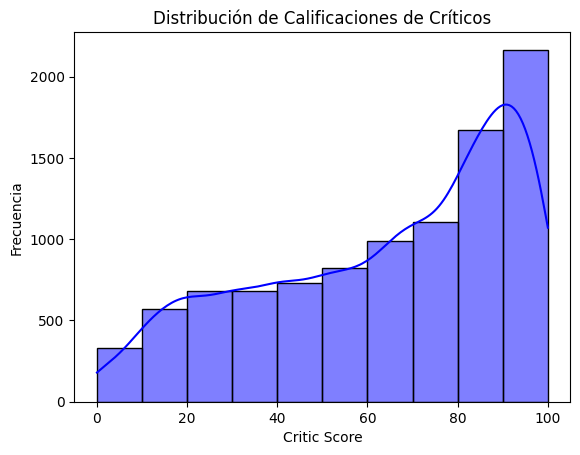

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de 'critic_score'
sns.histplot(ce['critic_score'], bins=10, kde=True, color='blue')
plt.title('Distribución de Calificaciones de Críticos')
plt.xlabel('Critic Score')
plt.ylabel('Frecuencia')
plt.show()

Los críticos suelen calificar mejor que peor a la audiencia. Podemos hacer una distribución de las calificaciones para ver cómo se distribuyen las puntuaciones en tu dataset. La mayoría de las calificaciones se concentran en el rango de 80 a 100. Se observa una0 distribución sesgada hacia la derecha.

### Evolución de Calificaciones (critic_score vs. audience_score) Medianas por Año

In [29]:
yearly_scores = conexion.execute("""
    SELECT 
        movieYear,
        MEDIAN(critic_score) as median_critic_score,
        MEDIAN(audience_score) as median_audience_score,
        COUNT(*) as movies_per_year
    FROM MOVIES
    WHERE movieYear IS NOT NULL 
        AND critic_score IS NOT NULL 
        AND audience_score IS NOT NULL
        AND critic_score > 0 
        AND audience_score > 0
    GROUP BY movieYear
    ORDER BY movieYear
""").df()

In [30]:
import plotly.graph_objects as go
from IPython.display import display 

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=yearly_scores['movieYear'],
    y=yearly_scores['median_critic_score'],
    name='Críticos (Mediana)',
    line=dict(color='blue')
))
fig.add_trace(go.Scatter(
    x=yearly_scores['movieYear'],
    y=yearly_scores['median_audience_score'],
    name='Audiencia (Mediana)',
    line=dict(color='red')
))

# Agregar películas por año como gráfico de barras en el eje y secundario
fig.add_trace(go.Bar(
    x=yearly_scores['movieYear'],
    y=yearly_scores['movies_per_year'],
    name='Películas por Año',
    yaxis='y2',
    opacity=0.3,
    marker_color='gray'
))

# Update layout with secondary y-axis
fig.update_layout(
    title='Evolución de Calificaciones Medianas por Año',
    xaxis_title='Año',
    yaxis_title='Puntuación (Mediana)',
    yaxis2=dict(
        title='Número de Películas',
        overlaying='y',
        side='right'
    ),
    template='plotly_white',
    hovermode='x unified'
)

fig.show()

Este análisis revela patrones fascinantes en las calificaciones de películas a lo largo del tiempo:

1. Dinámica Histórica de Calificaciones (Punto de Inflexión 1993):
- Antes de 1993: Las calificaciones del público eran consistentemente más bajas que las de los críticos
- 1993-2013: Los críticos se volvieron más exigentes, otorgando puntuaciones más bajas que el público
- Después de 2013: Retorno al patrón anterior a 1993, con calificaciones del público siendo más favorables

2. Observaciones Clave:
- El período de 20 años (1993-2013) representa una era única donde los críticos fueron notablemente más críticos
- Este cambio podría reflejar modificaciones en:
  * Estándares de evaluación crítica
  * Patrones de consumo del público
  * La evolución del marketing y distribución cinematográfica

3. Análisis de Volumen de Estrenos:
- Años pico para estrenos de películas:
  * 2023: Mayor número de estrenos
  * 2016: Segundo lugar en cantidad
- El aumento en 2023 puede atribuirse a:
  * Acumulación de estrenos post-pandemia
  * Producciones retrasadas finalmente completadas
  * Estudios liberando sus líneas de contenido

### Wordcloud de quote

In [31]:
df = conexion.query(
"""
SELECT quote
FROM CRITIC_REVIEWS;
""").to_df()

In [32]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:

import nltk
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords


nltk.download('stopwords')

# Función de limpieza automática de texto
def clean_text_auto(text):
    text = ''.join([char for char in text if char not in string.punctuation])
    text = text.lower()
    stop_words = set(stopwords.words('english'))  # Puedes cambiar a otro idioma si es necesario
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text

# Aplicamos la limpieza automática a la columna 'quote'
df['cleaned_quote'] = df['quote'].apply(lambda x: clean_text_auto(str(x)))

# Unimos todos los textos limpios en un solo string
text = ' '.join(df['cleaned_quote'].dropna())

# Creamos la wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


ModuleNotFoundError: No module named 'nltk'

### Cantidad de reseñas de audiencia con spoilers o malas palabras

In [224]:
base = conexion.query(
""" SELECT 
    COUNT(*) FILTER (WHERE hasSpoilers = TRUE) AS spoilers_count,
    COUNT(*) FILTER (WHERE hasProfanity = TRUE) AS profanity_count
FROM USER_REVIEWS ;
""").to_df()


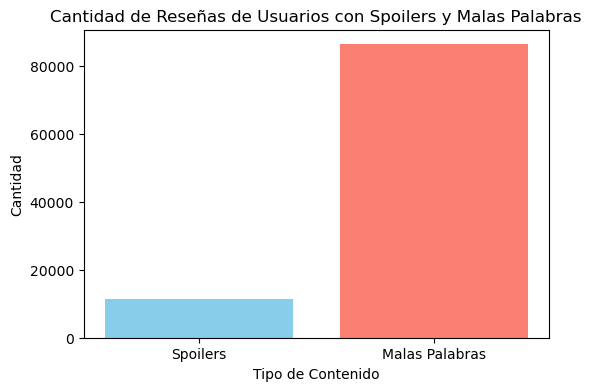

In [225]:
data = pd.DataFrame({
    'Tipo': ['Spoilers', 'Malas Palabras'],
    'Cantidad': [base['spoilers_count'][0], base['profanity_count'][0]]
})

# Gráfico de barras
plt.figure(figsize=(6,4))
plt.bar(data['Tipo'], data['Cantidad'], color=['skyblue', 'salmon'])
plt.title('Cantidad de Reseñas de Usuarios con Spoilers y Malas Palabras')
plt.ylabel('Cantidad')
plt.xlabel('Tipo de Contenido')
plt.show()

Se observan reseñas con mayor cantidad de malas palabras que con spoilers.

### Top 10 de reseñas por crítico (criticName)

In [229]:
df = conexion.query(
"""
SELECT criticName, count(*) AS criticNameCounts
FROM CRITIC_REVIEWS
GROUP BY criticName
ORDER BY criticNameCounts DESC
LIMIT 10
;
""").to_df()

C:\Users\Cindy\AppData\Local\Temp\ipykernel_5808\177322773.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




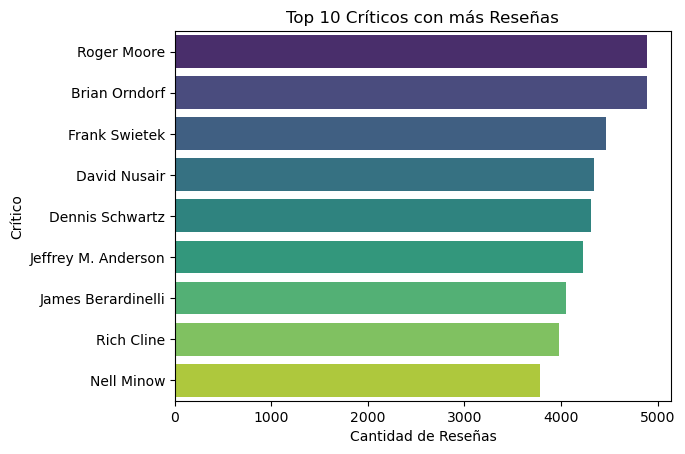

In [230]:
sns.barplot(x=df['criticNameCounts'], y=df['criticName'], palette='viridis')
plt.title('Top 10 Críticos con más Reseñas')
plt.xlabel('Cantidad de Reseñas')
plt.ylabel('Crítico')
plt.show()


Roger Moore y Brian Orndorf lideran el ranking con aproximadamente 4,500 reseñas cada uno. Neil Minow, en la décima posición, mantiene un número significativo de reseñas (~3,800)

### Top 10 de reseñas por medio (publicationName)

In [233]:
df = conexion.query(
"""
SELECT publicationName, count(*) AS publicationNameCounts
FROM CRITIC_REVIEWS
GROUP BY publicationName
ORDER BY publicationNameCounts DESC
LIMIT 10
;
""").to_df()

C:\Users\Cindy\AppData\Local\Temp\ipykernel_5808\2438680699.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




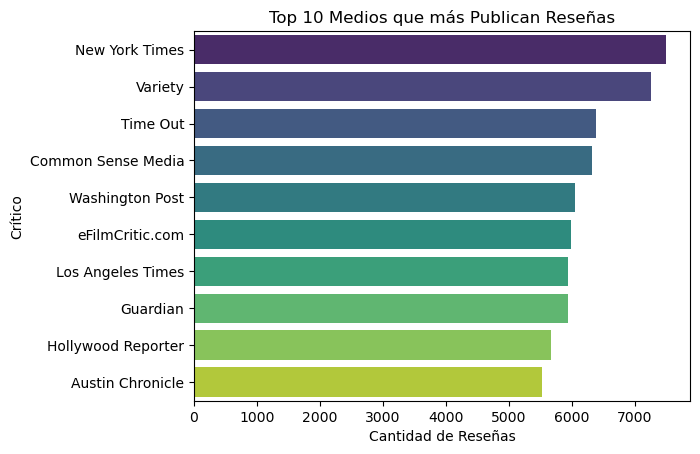

In [234]:
sns.barplot(x=df['publicationNameCounts'], y=df['publicationName'], palette='viridis')
plt.title('Top 10 Medios que más Publican Reseñas')
plt.xlabel('Cantidad de Reseñas')
plt.ylabel('Crítico')
plt.show()


Los medios que más publicaciones realizan de reviewa de críticos son: New York Times y Variety.

### Gráfico de Evolución de Calificaciones (critic_score vs. audience_score) Medianas por Año

In [237]:
quality_check = conexion.execute("""
    SELECT 
        COUNT(*) as total_movies,
        COUNT(CASE WHEN critic_score IS NOT NULL AND audience_score IS NOT NULL THEN 1 END) as movies_with_both_scores,
        COUNT(CASE WHEN critic_score IS NULL AND audience_score IS NOT NULL THEN 1 END) as only_audience_score,
        COUNT(CASE WHEN critic_score IS NOT NULL AND audience_score IS NULL THEN 1 END) as only_critic_score,
        COUNT(CASE WHEN critic_score IS NULL AND audience_score IS NULL THEN 1 END) as no_scores
    FROM MOVIES
""").df()

print("Data Quality Analysis:")
display(quality_check)

Data Quality Analysis:


,total_movies,movies_with_both_scores,only_audience_score,only_critic_score,no_scores
0,10233,9649,495,89,0


In [238]:

top_differences = conexion.execute("""
    WITH valid_movies AS (
        SELECT 
            movieTitle,
            movieYear,
            critic_score,
            audience_score,
            critic_sentiment,
            audience_sentiment,
            ABS(critic_score - audience_score) as score_difference
        FROM MOVIES
        WHERE critic_score IS NOT NULL 
          AND audience_score IS NOT NULL
          AND critic_score > 0 
          AND audience_score > 0
    )
    SELECT 
        movieTitle,
        movieYear,
        critic_score,
        audience_score,
        critic_sentiment,
        audience_sentiment,
        score_difference,
        CASE 
            WHEN critic_score > audience_score THEN 'Critics Preferred'
            WHEN audience_score > critic_score THEN 'Audience Preferred'
            ELSE 'Equal Rating'
        END as preference
    FROM valid_movies
    ORDER BY score_difference DESC
    LIMIT 10
""").df()

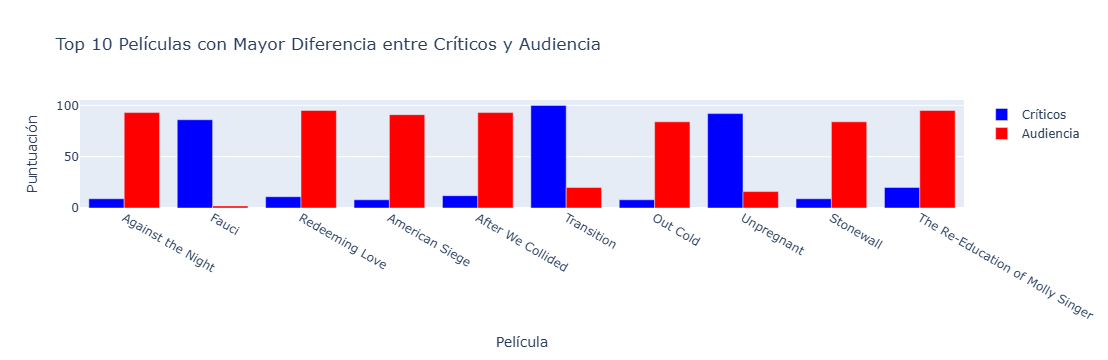

In [239]:
fig = go.Figure()
fig.add_trace(go.Bar(x=top_differences['movieTitle'], y=top_differences['critic_score'],
                    name='Críticos', marker_color='blue'))
fig.add_trace(go.Bar(x=top_differences['movieTitle'], y=top_differences['audience_score'],
                    name='Audiencia', marker_color='red'))
fig.update_layout(title='Top 10 Películas con Mayor Diferencia entre Críticos y Audiencia',
                 xaxis_title='Película',
                 yaxis_title='Puntuación',
                 barmode='group')
fig.show()

Este gráfico revela patrones interesantes en la disparidad entre los puntajes de críticos y audiencia en una escala de 0 a 100:

1. Casos Extremos:
- 'Transition' muestra la mayor disparidad, con críticos otorgando aproximadamente 95 puntos mientras la audiencia solo dio cerca de 20 puntos, una diferencia de 75 puntos
- 'Against the Night' presenta el caso opuesto, con un puntaje de audiencia de 90 puntos frente a solo 10 puntos de los críticos, una diferencia de 80 puntos

2. Patrones de Disparidad:
- En 6 de los 10 casos, la audiencia puntuó significativamente más alto que los críticos
- En 4 películas, los críticos dieron puntuaciones notablemente más altas que la audiencia
- Las diferencias son sustanciales, frecuentemente superando los 60 puntos en la escala

3. Observaciones Específicas:
- Películas como 'Redeeming Love', 'American Siege' y 'After We Collided' muestran un patrón similar donde la audiencia las valoró con más de 85 puntos mientras los críticos las calificaron por debajo de 20 puntos
- 'The Re-Education of Molly Singer' recibió aproximadamente 90 puntos de la audiencia contra 20 puntos de los críticos

4. Implicaciones:
- La magnitud de estas diferencias es particularmente significativa considerando que es una escala continua de 100 puntos
- Sugiere evaluaciones fundamentalmente opuestas entre críticos y público
- Las diferencias de más de 60 puntos indican una polarización extrema en la recepción de estas películas.

In [244]:
tiempoFinal = time.time()
tiempoTotal2 = tiempoFinal - tiempoInicio2
print(tiempoTotal2)

264.26571774482727


### COMPONENTE B: Machine Learning (ML), NLP, o Análisis de Grafos

- En todos los proyectos los estudiantes deberán realizar DOS (en los grupos de 5 personas) o UN (en el grupo de 4 personas) análisis de entre: 
Machine Learning: Deberán utilizar Spark MLib
NLP: Deberán utilizar Spark MLib
Análisis de Grafos: Deberán utilizar Spark GraphFrames
- Ejemplos: un modelo de regresión logística, un análisis del degree centrality de un grafo, un modelo utilizando tokenización TF-IDF, un modelo de xgboost, etc.
- Estos análisis pueden ser realizados en un subconjunto de los datos. Ejemplo: filtrar ciertos aeropuertos, filtrar solamente el TOP 10 de subreddits, filtrar solamente el TOP 